# Analisi Esplorativa del Mondo Anime
## Progetto HCI — Ferraud & Russo
Per molte persone gli **aime** sono solamente cartoni animati giapponesi, ne più ne meno. Noi però vogliamo utilizzare l'analisi di questi dati per raccontare da cosa è composto per davvero questo mondo, personaggi, film, serie e persone che lavorano a tutti gli effetti per la loro realizzazione.
Il nostro obiettivo è mostrare le informazioni che abbiamo a disposizione sotto forma di grafici e tabelle che ci aiutino a raccontare al meglio i dettagli di questa nicchia (se così si può chiamare) dell'intrattenimento.  
  
Iniziamo caricando le tabelle di cui avremo bisogno per analizzare il dataset.
Il dataset in questione è stato "ripulito" precedentemente per ottenere dati il più possibile omogenei e consistenti. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
%pip install plotly
import plotly.express as px
%pip install statsmodels
import statsmodels.api as sm
%matplotlib inline
%pip install seaborn
import seaborn as sns
%pip install matplotlib
%pip install geopandas
from datetime import datetime
from collections import Counter
from IPython.display import clear_output

clear_output()

In [2]:
# Unione dei file relativi ai personaggi
characterAW_df = pd.read_csv('character_anime_works_cleaned.csv')
characterAW_df.head()
characterNN_df = pd.read_csv('character_nicknames_cleaned.csv')
characterNN_df.head()
character_df = pd.read_csv('character_cleaned.csv')
character_df.head()
character_df = pd.merge(character_df, characterAW_df, on='character_mal_id', how='left')
character_df = pd.merge(character_df, characterNN_df, on='character_mal_id', how='left')
character_df.drop_duplicates(subset=['character_mal_id'], inplace=True)
character_df.head()
clear_output()

In [10]:
details_df = pd.read_csv('details_cleaned.csv')
details_df.head()
clear_output()

## Per chi non lo sapesse...
Si potrebbe facilmente cadere in errore pensando che gli anime siano unicamente cartoni animati per bambini, la verità è che ci sono tanti formati con cui vengoni distribuiti, tra questi trovimo: film, serie , libri, fumetti, musical e via dicendo.

Vogliamo mostrare un grafico che rappresenta bene i diversi formati in cui è possibile trovare un anime:

In [11]:
# Prepariamo i dati
type_counts = details_df['type'].value_counts().reset_index()
type_counts.columns = ['Tipo', 'Conteggio']

# Creazione del grafico
plt = px.pie(type_counts, 
             values='Conteggio', 
             names='Tipo', 
             hole=0.5,                                  # Trasforma la torta in ciambella
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Proporzione Formati Anime nel Dataset',
             template='plotly_dark')

# Personalizzazione dei dettagli
plt.update_traces(
    textposition='inside', 
    textinfo='percent+label', 
    marker=dict(line=dict(color='#000000', width=2))   # Bordo sottile tra le fette
)

plt.update_layout(
    title_x=0.5,
    annotations=[dict(text='Formati', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

plt.show()

Provando a contestualizzare ancora meglio i dati possiamo dire che circa il 30% del mercato riguarda le **serie televisive**, che in un certo senso sono un cavallo di battaglia per questo genere di animazione, quest'ulltime assieme ai **film** compongono quasi il 50% della produzione.
Ricoprono anche una grande fetta di mercato **OVA** e **ONA** che per chi non lo sapesse sono raccolte di episodi speciali o contenuti aggiuntivi che non vengono passati in televisione o al cinema ma vengono dati direttamente ai clienti tramite piattaforme come YouTube o Netflix.
Infine citiamo i video promozionali e i contenuti commerciali che hanno lo scopo di annunciare e pubblicizzare nuove uscite.

Come possiamo vedere quindi il mondo degli anime è comparabile al cinema in quanto è una vera e propria parte del mercato per quanto riguarda **l'intrattenimento**.

Per dare un po' di contesto in più citiamo i quindici anime più "famosi" secondo i dati che abbiamo a disposizione:

In [12]:
top_ranked = details_df.sort_values('favorites', ascending=False).head(15)[['title', 'favorites', 'rank', 'genres']]
top_ranked.reset_index(drop=True, inplace=True)
top_ranked.index = top_ranked.index + 1

top_ranked.style \
    .format({'rank': '{:.0f}'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])


# 1. Prepariamo i dati: ordiniamo per favorites per una scala discendente pulita
top_ranked_sorted = top_ranked.sort_values('favorites', ascending=True)

# 2. Creiamo il grafico a barre orizzontali
plt = px.bar(top_ranked_sorted, 
             x='favorites', 
             y='title',
             orientation='h',
             color='rank',               # Il colore indica la posizione in classifica
             color_continuous_scale='Reds_r', # Rosso scuro per i Rank migliori (1, 2, 3...)
             hover_data=['genres', 'rank'],   # Info extra al passaggio del mouse
             text='favorites',           # Mostra il valore numerico sulla barra
             title='Top 15 Anime: Popolarità (Barre) e Qualità (Colore)',
             template='plotly_dark')

# 3. Ottimizzazione dello spazio e dei testi
plt.update_layout(
    height=700,                 # Aumentiamo l'altezza per distanziare i nomi
    xaxis_title="Numero di Preferiti",
    yaxis_title="",
    title_x=0.5,
    coloraxis_colorbar=dict(title="Rank (Qualità)") # Rimosso reverse=True, non supportato
)

plt.update_traces(
    texttemplate='%{text:.2s}', # Abbrevia i numeri (es. 2.5k invece di 2500)
    textposition='outside',     # Mette i numeri fuori dalle barre per non coprire il nome
    cliponaxis=False            # Impedisce che il testo venga tagliato
)

plt.show()

Avendo a disposizione parecchi dati abbiamo deciso di mostrare non solo quali sono gli anime più famosi ma anche quanto sono realmente amati dal pubblico.
Tra questi titoli vigliamo citarne tre che nolto probabilmente tutti conoscono: One peace, Death note e Naruto.
Grazie a questo grafico possiamo vedere che nonostante One peace sia il più popolare ha un rank (ovvero l'indicie di gradimento) molto basso mentre Naruto che si trova a metà della nostra classifica è con grande margine il più amato di tutti.

# E per quanto riguarda i generi?
Dopo aver buttato l'occhio sui titoli più famosi non possiamo non interrogarci su quali siano i generi predominanti anche perchè la domanda alla quale vogliamo rispondere è:  
**Gli anime sono cartoni per bambini o trattano anche argomenti per adulti?**

In [13]:
# 1. Pulizia e conteggio rapido con Pandas (molto più veloce del ciclo for)
genre_counts = details_df['genres'].str.split(', ').explode().str.strip("[]'\" ").value_counts().head(10).reset_index()
genre_counts.columns = ['Genere', 'Conteggio']

# 2. Creazione del grafico moderno
plt = px.bar(genre_counts, 
             x='Conteggio', 
             y='Genere', 
             orientation='h',
             color='Conteggio',
             color_continuous_scale='Turbo', # Scala cromatica vibrante e moderna
             text='Conteggio',               # Mostra il numero sulla barra
             title='Top 10 Generi Dominanti nel Mondo Anime',
             template='plotly_dark')

# 3. Tuning estetico
plt.update_layout(
    yaxis={'categoryorder':'total ascending'}, # I più comuni in alto
    xaxis_title="Numero di Titoli",
    yaxis_title="",
    title_font_size=24,
    coloraxis_showscale=False,  # Pulizia: rimuoviamo la barra della legenda colore
    margin=dict(l=100)          # Spazio per i nomi dei generi
)

plt.update_traces(
    textposition='outside', 
    marker_line_color='rgb(8,48,107)', # Bordo sottile per definire le barre
    marker_line_width=1.5, 
    opacity=0.9
)

plt.show()

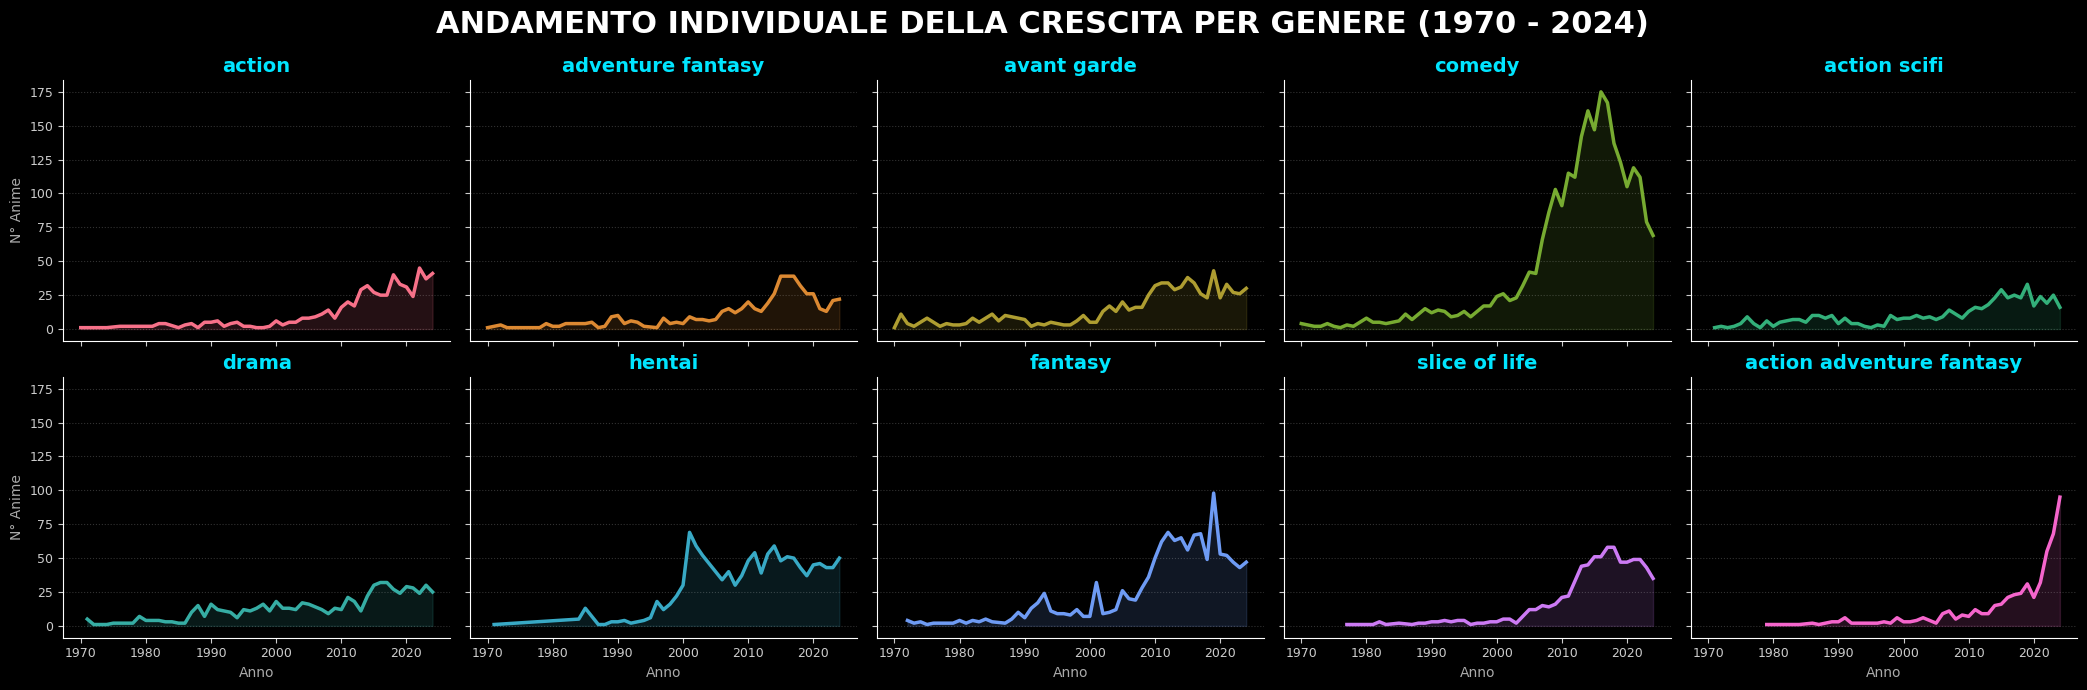

In [38]:
# 1. Preparazione Dati
df_genres = details_df.copy()

# Pulizia date e generazione colonna Anno
df_genres['year'] = pd.to_datetime(df_genres['start_date'], errors='coerce').dt.year
# Filtriamo per avere dati significativi (es. dal 1970 ad oggi)
df_genres = df_genres[(df_genres['year'] >= 1970) & (df_genres['year'] <= 2024)]

# Esplosione dei generi (da stringa a righe singole)
df_genres['genres'] = df_genres['genres'].str.split(', ')
df_exploded = df_genres.explode('genres')

# Conteggio per anno e genere
genre_trend = df_exploded.groupby(['year', 'genres']).size().reset_index(name='count')

# Identifichiamo i 10 generi più popolari per la visualizzazione
top_genres = df_exploded['genres'].value_counts().nlargest(10).index
data_plot = genre_trend[genre_trend['genres'].isin(top_genres)]

# 2. Impostazione Estetica
plt.style.use('dark_background')

# 3. Creazione dello Small Multiples (FacetGrid)
# col_wrap=5 significa che avremo 2 righe da 5 grafici ciascuna
g = sns.FacetGrid(data_plot, 
                  col="genres", 
                  col_wrap=5, 
                  hue="genres", 
                  palette="husl", 
                  height=3.5, 
                  aspect=1.2)

# Mappiamo il grafico a linee su ogni riquadro
g.map(sns.lineplot, "year", "count", linewidth=2.5)

# Aggiungiamo un riempimento sotto la linea per migliorare la leggibilità della "massa"
g.map(plt.fill_between, "year", "count", alpha=0.15)

# 4. Rifiniture e Titoli
g.set_titles("{col_name}", fontweight='bold', size=14, color='#00e5ff')
g.set_axis_labels("Anno", "N° Anime", color='#aaaaaa')

# Regoliamo gli assi e la griglia per ogni sotto-grafico
for ax in g.axes.flat:
    ax.grid(axis='y', linestyle=':', alpha=0.2)
    ax.tick_params(colors='#cccccc', labelsize=9)
    # Rimuoviamo i bordi per un look più "open"
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

# Titolo principale del progetto
plt.subplots_adjust(top=0.88)
g.fig.suptitle('ANDAMENTO INDIVIDUALE DELLA CRESCITA PER GENERE (1970 - 2024)', 
               fontsize=22, fontweight='bold', color='white')

plt.show()

Per rispondere in maniera completa alla nostra domanda analizziamo i generi partendo dall'alto. 
Nel secondo grafico invece abbiamo voluto mostrare la creascita che qeusti genere hanno avuto negli anni.   
In cima alla lista con un grandissimo margine troviamo la **commedia** ovvero il genere per eccellenza nella ricerca del divertimento, riguardando principalmente temi leggeri e divertenti.  
Al secondo posto troviamo il **fantasy** e al terzo posto il primo dato che ci fa capire che gli anime non sono prodotti unicamente per bambnini.  
Infatti gli **hentai** sono letteralmente cartoni animati a sfondo erotico ovviamente destinati ad un pubblico adulto.  
Gli altri due dati che ci interessano maggiormente sono gli **spaccati di vita** che raccontano la quotidianità dei personaggi e il **dramma** che tratta temi che vogliono suscitare forti emozioni come conflitti interiori, tristezza o situazioni sentimentali complesse.  
Grazie al grafico possiamo vedere che questi generi sono molto rilevanti rispetto alla produzione generale di anime e di conseguenza abbiamo la nostra risposta defintiva, gli anime non sono solo cartoni per bambini!

In [15]:
profile = pd.read_csv('profiles_cleaned.csv')
clear_output()

## Rafforziamo ancora di più la nostra tesi:
Ormai abbiamo capito che gli anime non sono solo destinati ai bambini e per rafforzare ulteriormente la nostra tesi vogliamo mostrare qual'è l'età delle persone che amano questo mondo tramite un grafico:

In [16]:
# 1. Calcolo dell'età
# Convertiamo 'birthday' in datetime in modo sicuro (invalidi/out-of-bounds -> NaT)
profile['birthday'] = pd.to_datetime(profile['birthday'], errors='coerce', infer_datetime_format=True)

# Calcoliamo l'età (anno corrente - anno di nascita). Se birthday è NaT il risultato sarà NA.
current_year = datetime.now().year
profile['age'] = (current_year - profile['birthday'].dt.year).where(profile['birthday'].notna())

# Pulizia: rimuoviamo età non realistiche (<0 o >120) impostandole a NA e usiamo Int64 per consentire NA
profile.loc[(profile['age'] < 0) | (profile['age'] > 120), 'age'] = pd.NA
profile['age'] = profile['age'].astype('Int64')

# Opzionale: escludi utenti con età maggiore di 80 (mantieni quelli con età NA se vuoi)
profile = profile[profile['age'].isna() | (profile['age'] <= 80)]

# 2. Preparazione dei dati per il grafico ad area
# Contiamo quante persone ci sono per ogni età (escludendo i NaN) e ordiniamo
age_dist = profile['age'].dropna().value_counts().sort_index().reset_index()
age_dist.columns = ['Età', 'Conteggio']
age_dist = age_dist.sort_values('Età')

# 3. Creazione del grafico ad area moderno
plt = px.area(
    age_dist, 
    x='Età', 
    y='Conteggio',
    title='Distribuzione dell\'Età degli Utenti',
    labels={'Conteggio': 'Numero di Persone', 'Età': 'Età (Anni)'},
    template='plotly_dark'  # Tema pulito e moderno
)

# Personalizzazione estetica
plt.update_traces(
    line_color='#636EFA', 
    fillcolor='rgba(99, 110, 250, 0.3)' # Colore dell'area semi-trasparente
)

plt.show()


C:\Users\Utente\AppData\Local\Temp\ipykernel_17596\3975930844.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Utente\AppData\Local\Temp\ipykernel_17596\3975930844.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Abbiamo voluto includere questo grafico nonostante non fossero tanti i dati disponibili perchè ci da la possibilità di vedere qual'è indicativamente il target del pubblico.  
Parliamo di persone tra i 20 e i 40 anni di età ed è perfettamente coerente con quanto dicevamo prima!  
Volendo scavare acora più a fondo vogliamo mostrare anche la distribuzione dei generi dei fan del quale abbiamo dati più completi e affidabili:

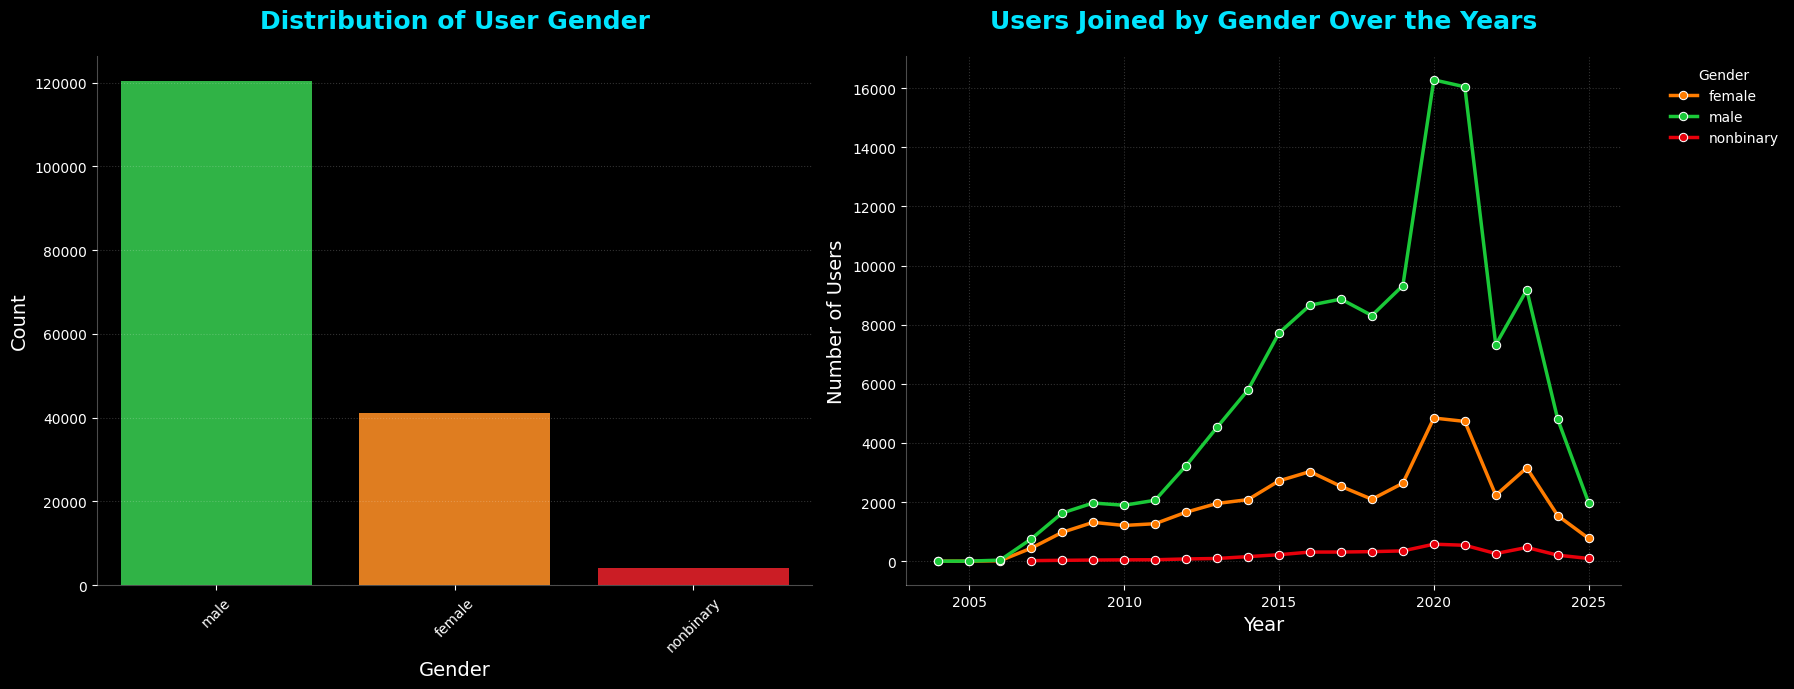

In [46]:
# --- 1. Preparazione Dati ---
profile['joined'] = pd.to_datetime(profile['joined'])
df_gender = profile['gender'].value_counts().reset_index()
df_gender.columns = ['gender', 'Count']

users_by_year_gender = profile.groupby([profile['joined'].dt.year.rename('year'), 'gender']).size().reset_index(name='Count')

# --- 2. Definizione Palette Unificata ---
# Creiamo una palette basata sui generi unici per bloccare i colori
unique_genders = profile['gender'].unique()
custom_palette = dict(zip(unique_genders, sns.color_palette("bright", len(unique_genders))))

# --- 3. Configurazione Subplots ---
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- GRAFICO 1: Bar Chart ---
# Usiamo la palette mappata per garantire la coerenza
sns.barplot(data=df_gender, x='gender', y='Count', hue='gender', palette=custom_palette, ax=ax1, legend=False)
ax1.set_title('Distribution of User Gender', fontsize=18, fontweight='bold', pad=20, color='#00e5ff')
ax1.set_xlabel('Gender', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle=':', alpha=0.2)

# --- GRAFICO 2: Line Chart ---
sns.lineplot(data=users_by_year_gender, x='year', y='Count', hue='gender', marker='o', palette=custom_palette, ax=ax2, linewidth=2.5)
ax2.set_title('Users Joined by Gender Over the Years', fontsize=18, fontweight='bold', pad=20, color='#00e5ff')
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Number of Users', fontsize=14)
ax2.grid(True, linestyle=':', alpha=0.2)
ax2.legend(title='Gender', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')

# Pulizia estetica per entrambi
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_alpha(0.3)
    ax.spines['bottom'].set_alpha(0.3)

plt.tight_layout()
plt.show()

Ora che abbiamo un quadro più completo cerchiamo di fare chiarezza.  
Come abbiamo potuto vedere gli anime trattano argomenti per bambini, ragazzi e adulti. Gli utenti hanno mediamente 30 anni e sono per il tre il 50% maschi.
Possiamo quindi ipotizzare che il fan medio riguardo al mondo degli anime è un uomo di circa 30 anni che ama film e serie più introspettive e profonde ma che probabilmente conosce i grandi classici del genere e ne apprezza il lato divertnete e avventuroso.
Dal momento che abbiamo un identikit completo del fan medio non ci resta che una domanda da farci:  
**Dove abita?**

## Dove vengono visti principalemente gli anime nel mondo?
Cerchiamo grazie ad un grafico che rappresenta il planisfero di capire dove vengono visti pricnipalemente gli anime.

In [17]:

# 1. Preparazione dati
# Assicurati che 'profile' sia il DataFrame corretto e contenga 'iso3'
location_counts = profile['iso3'].value_counts().reset_index()
location_counts.columns = ['iso_code', 'value']

# Pulizia: rimuoviamo eventuali codici non validi o 'not found'
location_counts = location_counts[location_counts['iso_code'].str.len() == 3]

# 2. Creazione della mappa interattiva (MODALITÀ NATIVA ISO-3)
plt = px.choropleth(
    location_counts,
    locations='iso_code',      # La colonna con i codici (ZAF, ITA, EGY...)
    locationmode='ISO-3',      # DICE A PLOTLY DI USARE I CODICI STANDARD
    color='value',             
    hover_name='iso_code',     
    color_continuous_scale="YlOrRd", 
    title='Distribuzione Geografica degli Utenti Anime nel Mondo',
    template='plotly_dark'     
)

# 3. Rifiniture estetiche "Premium"
plt.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    title_font_size=22,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="gray",
        projection_type='natural earth', # Proiezione curva, molto più moderna
        bgcolor='rgba(0,0,0,0)'          # Sfondo trasparente/nero
    )
)

plt.show()

Grazie a questo grafico possimo vedere che il paese con il più alto numero di fan è ovviamente il **giappone**, patria indiscussa degli anime in cui sono una vera e propria tradizione e motivo di orgoglio culturale.  
La cosa più interessante è vedere come come gli anime abbiano raggiunto e fatto innamorare il mondo occidnetale in particolar modo negli **USA** e più in generale nelle americhe.  
Per fare un controllo incrociato e dare più consistneza ai dati della mappa abbiamo deciso di mostrare quali sono le lingue nelle quali vengono doppiati maggiormente gli anime:

In [18]:
personAW_df = pd.read_csv('person_anime_works_cleaned.csv')
personVW_df = pd.read_csv('person_voice_works_cleaned.csv')
# Merge sequentially (fix typo 'hoew' -> 'how' and don't pass three dataframes to pd.merge)
personVW_df = pd.merge(personVW_df, personAW_df, on='person_mal_id', how='left')
personVW_df.drop_duplicates(subset=['person_mal_id'], inplace=True)

In [19]:
# 1. Preparazione dei dati
top_lingue = personVW_df['language'].value_counts().head(15).reset_index()
top_lingue.columns = ['Lingua', 'Conteggio']

# 2. Creazione del grafico a barre moderno
plt = px.bar(
    top_lingue, 
    x='Lingua', 
    y='Conteggio',
    text='Conteggio',              # Mostra il numero sopra le barre
    color='Conteggio',             # Colore variabile in base al numero di doppiaggi
    color_continuous_scale='Viridis', # Scala cromatica moderna (dal viola al giallo)
    template='plotly_dark',        # Sfondo nero professionale
    title='Top 10 Lingue nei Doppiaggi'
)

# 3. Rifiniture di design
plt.update_layout(
    xaxis_title="Lingua",
    yaxis_title="Numero di Occorrenze",
    font=dict(family="Verdana", size=14),
    title_x=0.5,                   # Centra il titolo
    coloraxis_showscale=False      # Nascondi la barra laterale dei colori per pulizia
)

# Arrotondamento visivo e posizione del testo
plt.update_traces(
    textposition='outside', 
    marker_line_color='white', 
    marker_line_width=1, 
    opacity=0.85
)

plt.show()

Come possiamo vedere il giapponese è la lingua principale seguita dall'inglese (Uk & USA) e successivamente dalle lingue europee.
Con questo dato possiamo definire conclusa l'analisi rigurdante la distribuzione geografica e linguistica perchè possiamo affermare con sicurezza quali sono i paesi in cui vengono visti di più gli anime e confermare che effettivmsente le lingue dei doppiaggi combaciano con i paesi.  
La nostra analisi però non è ancora finitia, abbiamo infatti deciso di utilizzare questo dato come collegamento della nostra breve storia per parlare delle persone che lavorano alla realizzazione degli anime.  


## Chi c'è dietro la realizzazione di un anime?
Vogliamo anaalizzare più approfonditamente chi sono le persone che lavorano alla realizzazione dei contenuti, di cosa si occupano dove vivono, quanti anni hanno e via dicendo.
Partiamo analizzando quali sono i **ruoli** necessari alla produzione di un anime:

In [20]:
# 1. Preparazione dei dati: ottieni le prime 10 posizioni
top_positions = personVW_df['position'].value_counts().head(10).reset_index()
top_positions.columns = ['Posizione', 'Conteggio']

# Ordina i dati per il conteggio in modo decrescente, così le barre sono ordinate
top_positions = top_positions.sort_values('Conteggio', ascending=True)

# 2. Creazione del grafico a barre orizzontali moderno
plt = px.bar(
    top_positions, 
    y='Posizione',               # L'asse Y avrà le posizioni
    x='Conteggio',               # L'asse X avrà i conteggi
    text='Conteggio',            # Mostra il numero accanto alle barre
    orientation='h',             # Rendi le barre orizzontali
    color='Conteggio',           # Colora le barre in base al valore
    color_continuous_scale=px.colors.sequential.Plasma_r, # Una palette moderna (sfumature calde)
    template='plotly_dark',      # Sfondo scuro per un look moderno
    title='Top 10 Posizioni più Comuni negli Anime'
)

# 3. Rifiniture di design per un look pulito e interattivo
plt.update_layout(
    xaxis_title="Numero di Occorrenze",
    yaxis_title="Posizione",
    font=dict(family="Arial", size=14, color="white"), # Testo bianco per contrasto
    title_x=0.5,                                      # Centra il titolo
    coloraxis_showscale=False                         # Nascondi la legenda del colore per pulizia
)

# Aggiorna le tracce per un effetto "glassmorphism" o "soft"
plt.update_traces(
    textposition='outside',                           # Metti il testo fuori dalle barre
    marker_line_color='rgba(255,255,255,0.7)',        # Bordo leggero e semi-trasparente
    marker_line_width=1,
    opacity=0.9,
    hovertemplate="<b>%{y}</b><br>Occorrenze: %{x}<extra></extra>" # Testo personalizzato al hover
)

plt.show()

Come possiamo vedere il **theme song performance** è il dato che compare in maniera più insistente nel grafico con varianti come op e ed.
Si tratta dei crediti che vengono ricevuti a un gruppo o un artista per i berani musicali presenti nel contenuto, principalemnte per sigle di apertura o ciusura del film/episodio.
Parliamo invece dell' **adr director** che a differenza di un regista cinematografico che riprende scene dal vivo, l'ADR Director lavora su un materiale già esistente (l'animazione giapponese) e deve "dirigere" i doppiatori affinché la nuova traccia vocale si integri perfettamente.  
Si occupa di gestire la sincronizzazione tra il labiale e il doppiatore, decide l'intonazione di voce e battua e come essa deve essere recitata e a volte gestisce anche il casting.  
Infine vediamo gli **original creator** ovvero coloro che ha pensato e scritto la storia, disegnando i personaggi e il contesto.  
Ovviamente esistono anche altre figure che si dividono il compito di disegnare, animare e dirigere la produzione.  

Ora che abbiamo visto quali sono i lavori necessari per produrre un anime cerchiamo di capire qual'è l'età delle persone che svolgono questi compiti e i paesi nei quali lavoano:

In [21]:
# Caricamento file
person_df = pd.read_csv('person_details_cleaned.csv')

import re

# 1. Estrazione anno (Regex per sicurezza)
def extract_year_robust(value):
    if pd.isna(value) or str(value).lower() == 'nan':
        return None
    match = re.search(r'(19\d{2}|20\d{2})', str(value))
    if match:
        return int(match.group(1))
    return None

# Applicazione
person_df['birth_year'] = person_df['birthday'].apply(extract_year_robust)

# ---------------------------------------------------------
# 2. FILTRO: Teniamo solo gli anni fino al 2010
# ---------------------------------------------------------
temp_df = person_df[person_df['birth_year'] <= 2010].copy()
temp_df = temp_df.dropna(subset=['birth_year'])

# Calcolo decennio
temp_df['decade'] = (temp_df['birth_year'] // 10 * 10).astype(int)

# 3. Aggregazione
decade_counts = temp_df['decade'].value_counts().sort_index().reset_index()
decade_counts.columns = ['Decennio', 'Conteggio']

# 4. Grafico ad Area
plt = px.area(
    decade_counts, 
    x='Decennio', 
    y='Conteggio',
    title='Distribuzione Nascita Professionisti (Fino al 2010)',
    template='plotly_dark',
    line_shape='spline',
    labels={'Decennio': 'Decennio di Nascita', 'Conteggio': 'Numero di Persone'}
)

# Estetica Cyan Glow
plt.update_traces(
    line_color='#00FBFF', 
    fillcolor='rgba(0, 251, 255, 0.4)',
    line_width=4,
    marker=dict(size=8, color='#00FBFF', symbol='circle')
)

plt.update_layout(
    title_x=0.5,
    xaxis=dict(
        showgrid=False, 
        dtick=10, 
        range=[min(decade_counts['Decennio']), 2010] # Forza l'asse a chiudersi al 2010
    ),
    yaxis=dict(gridcolor='rgba(255, 255, 255, 0.1)'),
    hovermode="x unified"
)

plt.show()

Come possiamo vedere le persone che lavorano al mondo degli anime (o hanno lavorato) si aggirano principalemnte tra gli anni 60 e 90, questo signidica che i professionisti del settore attualmente hanno circa 45 anni il che è perfettamente logico in quanto rispecchia la media di una classe lavoratrice standard.  
Ciò che è davvero interessante notare è come il grafico ci mostri indirettamente la crescita di popolarità che qesto genere di intreattenimento ha avuto nel tempo.  
Infatti sopratutto in occidente gli anime sono arrivati verso la fine del 900' grazie anche a cartoni diventati cult come Holly e Benji per esempio.

In [22]:
# 1. Preparazione dati
location_countsP = person_df['iso_alpha_3'].value_counts().reset_index()
location_countsP.columns = ['iso_code', 'value']
# Rimuoviamo eventuali "not found" o valori nulli che bloccherebbero il grafico
location_countsP = location_countsP[location_countsP['iso_code'] != 'not found'].dropna()

# 2. Creazione della mappa interattiva (Senza GeoJSON esterno, più veloce e preciso)
plt = px.choropleth(
    location_countsP,
    locations='iso_code',        # Colonna con codici ISO3 (es. ITA, USA)
    locationmode='ISO-3',        # Fondamentale: dice a Plotly di usare i codici standard
    color='value',               
    hover_name='iso_code',       
    color_continuous_scale="YlOrRd", 
    title='Distribuzione Geografica degli Utenti Anime nel Mondo',
    template='plotly_dark'       
)

# 3. Rifiniture estetiche "Premium"
plt.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    title_font_size=22,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="gray",
        projection_type='natural earth', # Proiezione più moderna e curva
        bgcolor='black' 
    )
)

plt.show()

Ora che sappiamo quasi tutto sugli addetti ai lavori del mondo anime ci resta da analizzare quali sono gli studios più influenti e attivi sul mercato.

In [23]:
# 1. Pulizia "Smart" con Pandas (molto più veloce del ciclo for)
studio_counts = (
    details_df['studios']
    .str.split(', ')               # Divide i nomi se ci sono più studi
    .explode()                     # Crea una riga per ogni studio
    .str.strip("[]'\" ")           # Rimuove caratteri indesiderati
    .value_counts()                # Conta le occorrenze
    .head(10)                      # Prende i primi 10
    .reset_index()
)
studio_counts.columns = ['Studio', 'Numero di Titoli']

# 2. Creazione del grafico interattivo
plt = px.bar(studio_counts, 
             x='Numero di Titoli', 
             y='Studio', 
             orientation='h',
             color='Numero di Titoli', 
             color_continuous_scale='Agsunset', # Scala cromatica calda e moderna
             text='Numero di Titoli',
             title='Top 10 Studios di Animazione per Volume di Produzione',
             template='plotly_dark')

# 3. Personalizzazione del design
plt.update_layout(
    yaxis={'categoryorder':'total ascending'}, # I "giganti" in alto
    xaxis_title="Titoli Prodotti",
    yaxis_title="",
    title_font_size=22,
    coloraxis_showscale=False,  # Pulizia estrema
    margin=dict(l=150)          # Più spazio per i nomi degli studi a sinistra
)

plt.update_traces(
    textposition='outside', 
    marker_line_color='white', 
    marker_line_width=1, 
    opacity=0.85
)

plt.show()

Per curiosità abbiamo deciso di non fermarci alla citazione degli studios più produttivi e famosi ma vogliamo far vedere come questi siano apprezzati o meno del pubblico.  
Infatti è molto importante dividere la quantità dalla qualità e capire se a volte queste combacino o se invece ciò non accade.  
Per questo nel prossimo grafico vogliamo mostrare i voti che gli anime prodotti da questi studios hanno ricevuto dal pubblico: 

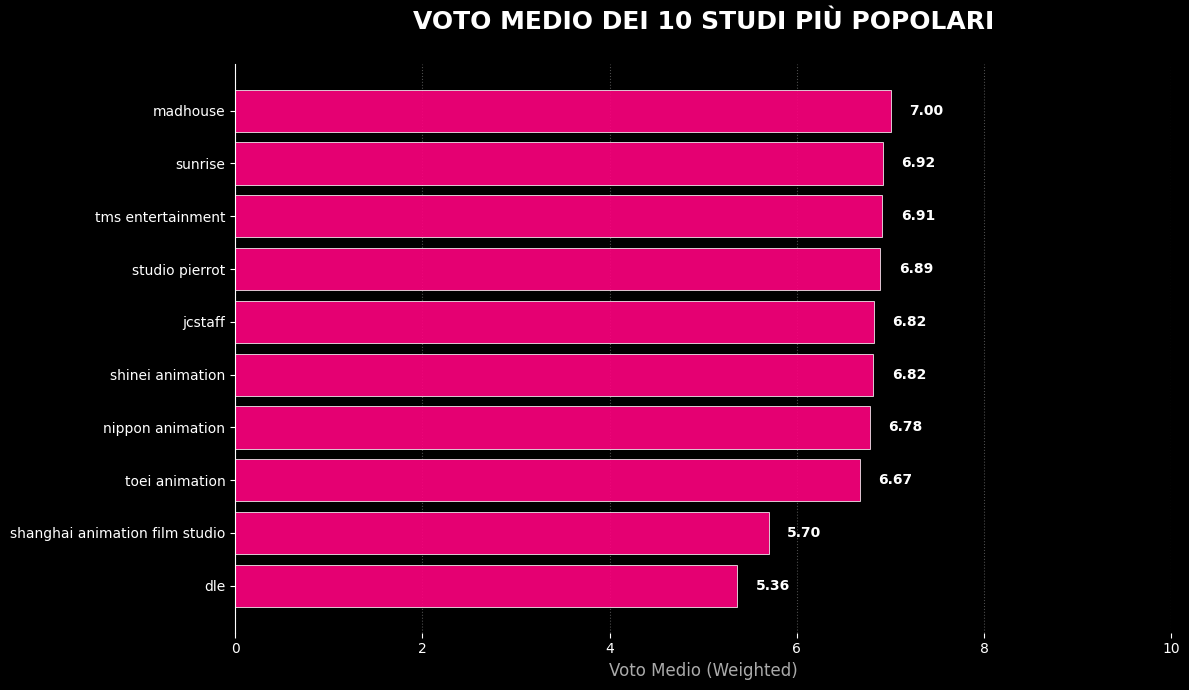

In [18]:
# 1. Impostazione stile Dark Mode
plt.style.use('dark_background')

# 2. Preparazione dati
voto = pd.read_csv('stats_cleaned.csv')
valutazioneStudios = pd.merge(details_df[['anime_mal_id', 'studios', 'popularity']], 
                              voto[['anime_mal_id', 'voto_medio']], 
                              on='anime_mal_id', how='left')
valutazioneStudios = valutazioneStudios.dropna(subset=['studios', 'voto_medio'])

# --- MODIFICA LOGICA: Calcoliamo sia media voto che somma popolarità ---
# Nota: In molti dataset 'popularity' è un ranking (1 = più popolare). 
# Se nel tuo caso numeri ALTI = più popolare, usa .sum(). Se è un ranking, dovresti ordinare diversamente.
studio_stats = valutazioneStudios.groupby('studios').agg({
    'voto_medio': 'mean',
    'popularity': 'sum'  # Assumiamo che la somma della popolarità indichi lo studio più seguito
}).sort_values(by='popularity', ascending=False).head(10)

# Ordiniamo per voto per rendere il grafico più armonioso visivamente
top_studios = studio_stats.sort_values(by='voto_medio', ascending=True)

# 3. Creazione del grafico
fig, ax = plt.subplots(figsize=(12, 7))

# Colore Neon Purple/Pink per differenziarlo dal precedente
bars = ax.barh(top_studios.index, top_studios['voto_medio'], 
               color='#ff007f', edgecolor='white', linewidth=0.6, alpha=0.9)

# 4. Modernizzazione estetica
ax.set_title('VOTO MEDIO DEI 10 STUDI PIÙ POPOLARI', fontsize=18, fontweight='bold', color='white', pad=25)
ax.set_xlabel('Voto Medio (Weighted)', fontsize=12, color='#aaaaaa')

# Limite asse X per dare respiro alle etichette (es. da 0 a 10)
ax.set_xlim(0, 10) 

# Aggiungiamo i valori numerici
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
            f'{width:.2f}', va='center', ha='left', color='white', fontweight='bold')

# Pulizia estetica
for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.xaxis.grid(True, linestyle=':', alpha=0.3)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

Possiamo notare che i voti medi di questi studios sono molto simili, nonostante alcuni producano molto più di altri, questo grafico ci permette di dire per esempio che la **Toei Animation** mantiene una qualità del prodotto molto alta nonostante sia molto più attiva nella produzione di anime.  
Dai dati ottenuti possiamo dire che gli studios principali ricevono più o meno lo stesso gradimento da parte del pubblico afffermandosi su una media che si avvicina al 7.  